## Imports and parsing complete `glass.csv` file from _Kaggle_

In [34]:
# Numerical and Basics
import pandas as pd
import numpy as np
# from sklearn import datasets

# DataViz and Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning Algorithms and Goodness-Of-Fit Metrics
# from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
glass_dataset = pd.read_csv("glass.csv")
glass_dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
glass_dataset.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
# Search For Null Params
glass_dataset.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

All variables are numerical even the target type. On the other hand there are not null values.

## Descriptive Statistics, Features Importance and Correlation Analysis

First we want to check if the target classes ara unbalanced or not. This is important because we try to take this into account for further analysis and the splitting of the dataset.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '# Glass Types')

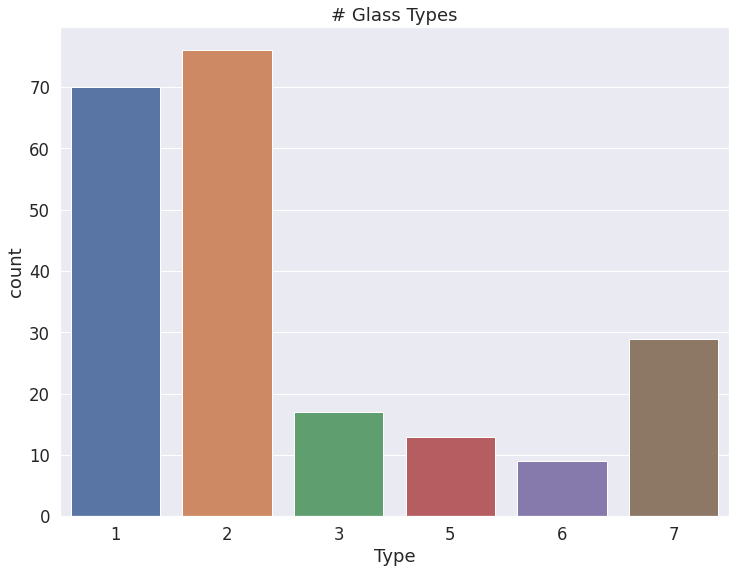

In [17]:
sns.set(style="darkgrid", font_scale=1.5)
plt.subplots(figsize = (12,9))
sns.countplot('Type',data=glass_dataset).set_title('# Glass Types')

Clearly target variables are unbalanced with class 1 and 2 more frequent than the others.

In [19]:
glass_dataset.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

**The columns in this dataset are:**
* First Column, RI: refractive index. 
* Columns 2 to 9. Pure Chemical Elements.
* Column 10: The Type of glass we want to classify


Features are far for being of similar scale. We have to use some normalization using `Scalers`:

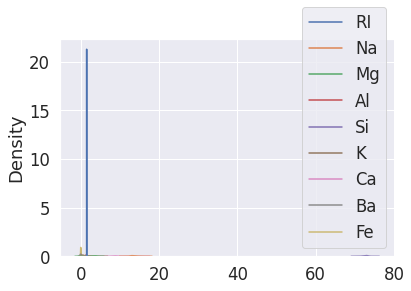

In [23]:
sns.kdeplot( data = glass_dataset.iloc[:,:-1])
plt.show()

By inspecting Boxplot representations:

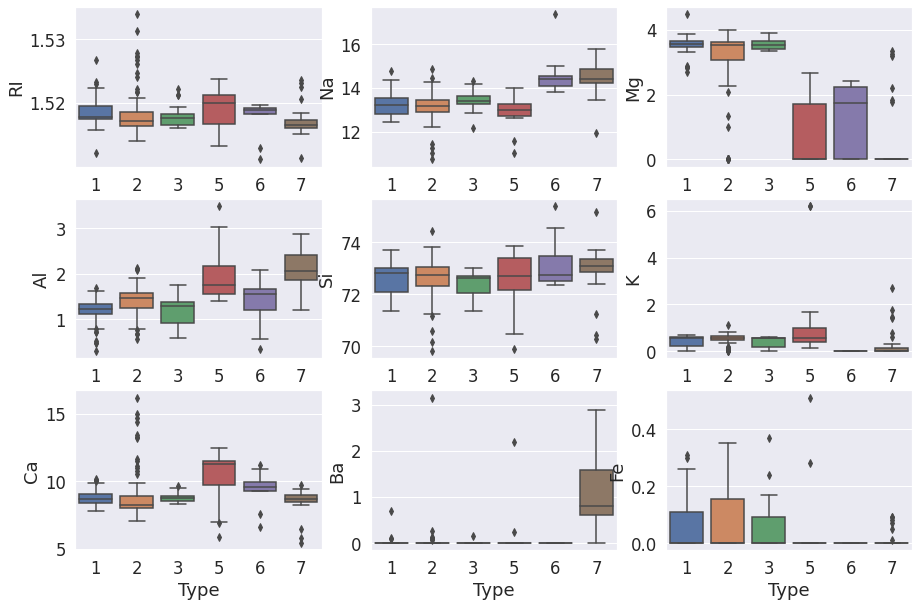

In [27]:
sns.set(style="darkgrid", font_scale=1.5)
plt.subplots(figsize = (15,10))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_dataset)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_dataset)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_dataset)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_dataset)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_dataset)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_dataset)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_dataset)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_dataset)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_dataset)
plt.show()

1. At first sight, we don't see a clear relation which relates a chemical composition, or a combination of compositions and/or the index of ligt refraction with the type of glass, with the exception of type `7` which is clearly composed by barium.

2. There are a plethora of outliers. The Scale of `Si` is very different from the others. Maybe using a `MinMaxScaler` is a good idea.

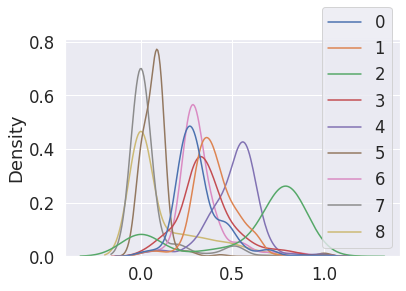

In [37]:
X = glass_dataset.iloc[:,:-1]
MinMax_scaler = MinMaxScaler()
Xscaled = MinMax_scaler.fit_transform(X)
sns.kdeplot( data= Xscaled)
plt.show()
# Far Better! We Well back to this point with the dataset previously splitted

## Model Fitting and Testing

In [92]:
# Separating the response (y) and explanatory (x) variables
X = glass_dataset.iloc[:,:-1]
y = glass_dataset["Type"].values

In [93]:
# The PCA
pca_red = PCA(n_components=5)
X = pca_red.fit_transform(X)

# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .25, 
                                                    random_state=202011, 
                                                    stratify = y) # We try to maintain proportions for the test set
# Scaling Correctly avoiding to filter information from test set to train set
# X_train = MinMax_scaler.fit_transform(X_train)
# X_test = MinMax_scaler.transform(X_test)

# Check whether the train and test have instances of all the glass types -> Testing Count
# datatest = pd. -> Comprobar que no se pierde el shape original en test
# print(np.unique(y_train))
# print(np.unique(y_test))

In [94]:
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

# XGBoost CLassifier
xgbMod = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 202011)
xgbMod.fit(X_train,y_train)
y_pred = xgbMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

In [95]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['XG Boost',sc2],
              ['Decision Tree',sc4]],columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.629630
1,XG Boost,0.611111
2,Decision Tree,0.703704


In [68]:
tuned_parameters = {'gamma': [0.001, 0.01, 0.1, 10],'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 1, 'gamma': 10}


In [69]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.6851851851851852

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.83      0.77        18
           2       0.57      0.63      0.60        19
           3       0.00      0.00      0.00         4
           5       0.60      1.00      0.75         3
           6       1.00      0.50      0.67         2
           7       1.00      0.75      0.86         8

    accuracy                           0.69        54
   macro avg       0.65      0.62      0.61        54
weighted avg       0.66      0.69      0.66        54



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(193.86, 0.5, 'predicted label')

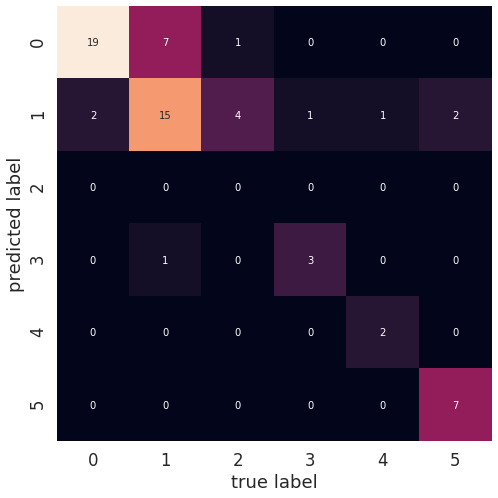

In [61]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')